In [11]:
import sys
import os
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


In [12]:
#params

plot_N2_profiles=True


In [13]:
config='GS36'
case='MPC001'
freq='1d'
year='2012'

list_dates=['m03d15','m09d15']

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
if config == 'EU36':
    gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
    maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'
if config == 'GS36':
    gridfile='/scratch/cnt0024/hmg2840/albert7a/GS36.L75/GS36.L75-I/GS36_coordinates.nc'
    maskfile='/scratch/cnt0024/hmg2840/albert7a/GS36.L75/GS36.L75-I/GS36.L75-MAA007_mesh_mask.nc'


In [14]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

  mesh_zgr version is v3.6
 npiglo =        1468
 npjglo =         950
 npk    =          75
 npt    =           1
 level           74
 level           73
 level           72
 level           71
 level           70
 level           69
 level           68
 level           67
 level           66
 level           65
 level           64
 level           63
 level           62
 level           61
 level           60
 level           59
 level           58
 level           57
 level           56
 level           55
 level           54
 level           53
 level           52
 level           51
 level           50
 level           49
 level           48
 level           47
 level           46
 level           45
 level           44
 level           43
 level           42
 level           41
 level           40
 level           39
 level           38
 level           37
 level           36
 level           35
 level           34
 level           33
 level           32
 level           31
 leve

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


  mesh_zgr version is v3.6
 npiglo =        1468
 npjglo =         950
 npk    =          75
 npt    =           1
 level           74
 level           73
 level           72
 level           71
 level           70
 level           69
 level           68
 level           67
 level           66
 level           65
 level           64
 level           63
 level           62
 level           61
 level           60
 level           59
 level           58
 level           57
 level           56
 level           55
 level           54
 level           53
 level           52
 level           51
 level           50
 level           49
 level           48
 level           47
 level           46
 level           45
 level           44
 level           43
 level           42
 level           41
 level           40
 level           39
 level           38
 level           37
 level           36
 level           35
 level           34
 level           33
 level           32
 level           31
 leve

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


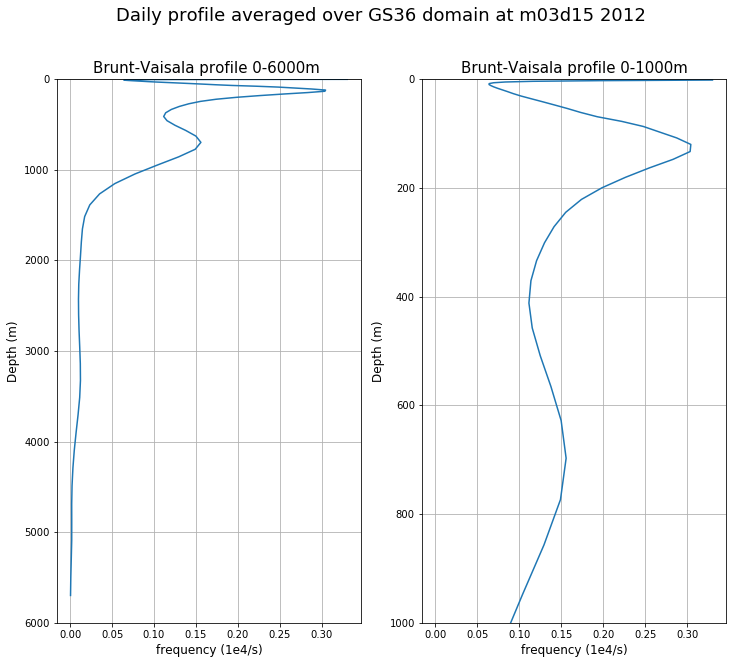

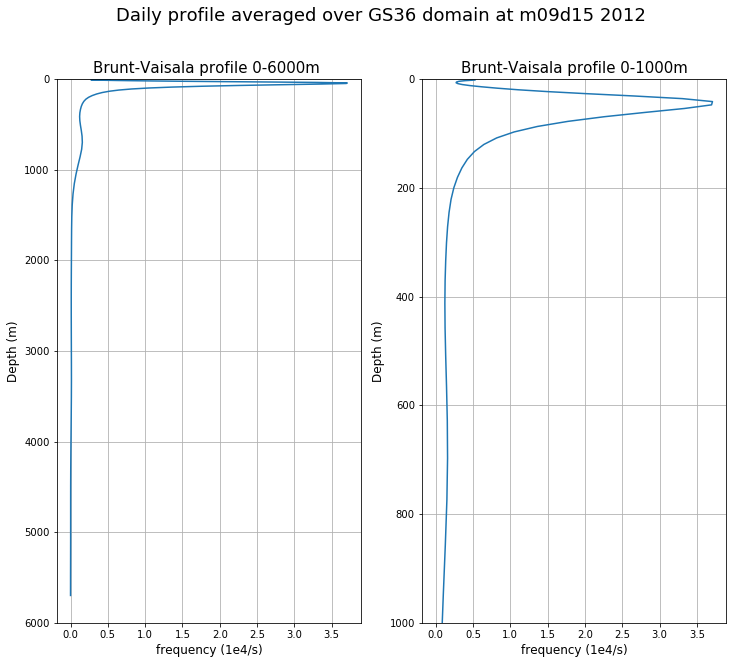

In [15]:
if plot_N2_profiles==True:
    for date in list_dates:
        fileT=datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+str(date)+'.'+str(freq)+'_gridT.nc'
        filebn2='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_y'+str(year)+str(date)+'.'+str(freq)+'_bn2.nc'
        if not os.path.exists(filebn2):
            !ln -sf $maskfile mesh_hgr.nc
            !ln -sf $maskfile mesh_zgr.nc
            !cdfbn2 -t $fileT -o $filebn2
            ! rm mesh*
        ds=xr.open_dataset(filebn2, chunks={'x':700,'y':1000,'time_counter':1,'deptht':1})
        bn2=ds.vobn2
        fig, axes = plt.subplots(1,2,figsize=(12,10))
        axes = axes.ravel()
        ax=axes[0]
        bn2_scale=10000*bn2
        bn2_scale.mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax)
        ax.set_ylim(6000,0)
        ax.set_ylabel('Depth (m)',fontsize=12)
        ax.set_xlabel('frequency (1e4/s)',fontsize=12)
        ax.grid()
        ax.set_title('Brunt-Vaisala profile 0-6000m ',fontsize=15)
        ax=axes[1]
        bn2_scale=10000*bn2
        bn2_scale.mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax)
        ax.set_ylim(1000,0)
        ax.set_ylabel('Depth (m)',fontsize=12)
        ax.set_xlabel('frequency (1e4/s)',fontsize=12)
        ax.grid()
        ax.set_title('Brunt-Vaisala profile 0-1000m',fontsize=15)
        fig.suptitle('Daily profile averaged over '+config+' domain at '+date+' '+str(year), fontsize=18)
        plt.savefig('Plots/'+config+'/Profiles/'+config+'-'+case+'y'+str(year)+str(date)+'_mean-N2-profile.png')